# Anisotropic models

If the energy-momentum tensor for the matter of the start is modified by 

$$ T_\mu^\nu = \mbox{diag}\left[\rho(r),-P(r),-P_\perp(r),-P_\perp(r)  \right] ,$$
the Einstein equations for the physical variables become

$$ \rho(r)= \frac{ {\rm e}^{-2\lambda}\left(2 r \lambda^{\prime}-1\right)+1 }{8\pi r^{2}}, $$
$$ P(r) =  \frac {{{\rm e}^{-2\,\lambda}}\left(2r \,\nu^{\prime} +1\right) -1}{8 \pi\,{r}^{2}}, $$
$$ P_\perp(r) =-\frac{{\rm e}^{-2\lambda}}{8\pi}\left[ \frac{\lambda^{\prime}-\nu^{\prime}}r-\nu^{\prime \prime }+\nu^{\prime}\lambda^{\prime}-\left(\nu^{\prime}\right)^2\right]. $$

If we propose that the anistropy modifies the density as $\rho=\alpha \rho_{\text{iso}}$ and that modification is entirely due to the tangential pressure so that $P_r=P_{\text{iso}}$, one can re arrange the system to find $\lambda$,  $\nu$ and $P_{\perp}$:
$$ \lambda^{\prime} = \frac{1}{2r}\left[ e^{2\lambda}\left( 8 \pi \alpha r^2 \rho_{\text{iso}} -1 \right) +1 \right], $$
$$ \nu^{\prime} = \frac{1}{2r}\left[ e^{2\lambda}\left( 8 \pi r^2 P_{\text{iso}} +1 \right) -1 \right], $$
$$  P_\perp(r) =-\frac{{\rm e}^{-2\lambda}}{8\pi}\left[ \frac{\lambda^{\prime}-\nu^{\prime}}r-\nu^{\prime \prime }+\nu^{\prime}\lambda^{\prime}-\left(\nu^{\prime}\right)^2\right]. $$
This system can be solved if we write $\nu^{\prime\prime}$ using a backward finite difference:

$$ \nu^{\prime\prime} = \frac{\nu^{\prime}(r)-\nu^{\prime}(r-\Delta{r})}{\Delta{r}}. $$

To deal with the apparent singularity of the metric functions in the center one can use a series expansion to first order of $e^{2\lambda}$ around $r=0$ 
$$ e^{2\lambda} = \left( 1 - \frac{2m}{r} \right)^{-1} \approx \left( 1 - \frac{8}{3} \alpha \pi r^2 \rho_c \right)^{-1} \approx 1 + \frac{8}{3} \alpha \pi r^2 \rho_c, $$
where it was used $m \approx \frac{4}{3}\alpha\pi \rho_{c} r^3 $ close to $r=0$.

With this result the system can be re-written as

$$ \lambda^{\prime} = 4\alpha\pi r \rho_{c} + \frac{32}{3} \alpha^2 \pi^2 r^3 \rho_c ^2 - \frac{4}{3} \alpha \pi r \rho_c ,$$
$$ \nu^{\prime} = 4\pi r P_{c} + \frac{32}{3} \alpha \pi^2 r^3 \rho_c P_c + \frac{4}{3} \alpha r \pi \rho_c ,$$
$$ P_{\perp} = -\frac{1}{8\pi} \left( 1 - \frac{8}{3} \alpha \pi r^2 \rho_c \right) \left[ 4 \pi (\alpha\rho_c - P_c) + \frac{32}{3}\alpha \pi^2 r^2 \rho_c(\alpha\rho_c - P_c) - \frac{8}{3} \alpha \pi \rho_c -\nu^{\prime \prime }+\nu^{\prime}\lambda^{\prime}-\left(\nu^{\prime}\right)^2 \right].$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate, interpolate
import math

In [3]:
epsilon = np.finfo(float).eps
print(epsilon)

2.220446049250313e-16


In [4]:
import Physical_Const as phys
h=phys.h 
c=phys.c
G=phys.G
Msun=phys.Msun
mn=phys.mn # Neutron mass


rhodim=mn**4.0*c**3.0/(8.0*np.pi**2*(h/(2.0*np.pi))**3.0) #Dimensions of energy density
rdim=c/np.sqrt(rhodim*G) # Dimensions of radius
mdim=rdim*c**2.0/G # Dimensions of mass
Pdim=rhodim*c**2 # Dimensions of pressure

In [5]:
SLy145=np.loadtxt('results3/H4/15.0651164887.dat',unpack=True)
rhoiso=SLy145[2]
Piso=SLy145[1]
riso=SLy145[-1]
alpha=1.1

def pisosly(r):
    P=interpolate.interp1d(riso,Piso)
    return P(r)
def rhoisosly(r):
    rho=interpolate.interp1d(riso,rhoiso)
    return rho(r)

In [6]:
rhoiso[0]

0.509358171531

In [7]:
def RK4(f, r, y, dr,rho_iso,P_iso,r_iso):
    """Propagates the solver one step further. Takes as inputs the RHS of the system f, the current location r,
    the current value of the variables y, and the stepsize. Returns the value of the variables in location r+dr."""
    k1,l1 = f(r,y)
    
    k2,l2 = f(r+0.5*dr,[y[0]+0.5*dr*k1,y[1]+0.5*dr*l1])   
    
    k3,l3 = f(r+0.5*dr,[y[0]+0.5*dr*k2,y[1]+0.5*dr*l2])
    
    k4,l4 = f(r+dr,[y[0]+dr*k3,y[1]+dr*l3])
    
    k=(dr/6)*(k1+2.0*k2+2.0*k3+k4)
    l=(dr/6)*(l1+2.0*l2+2.0*l3+l4)
    
    dlambdanew, dnunew = f(r+dr,[y[0]+k,y[1]+l])
    
    if (1.0-rho_iso(r)/rho_iso(r_iso[0])) < 100*epsilon :
        pt = - (1/(8*np.pi))*(1 - (8/3)*alpha*np.pi*(r**2)*rho_iso(r_iso[0]))*(4*np.pi*(alpha*rho_iso(r_iso[0])-P_iso(r_iso[0]))+(32/3)*(alpha)*(np.pi**2)*(r**2)*rho_iso(r_iso[0])*(alpha*rho_iso(r_iso[0])-P_iso(r_iso[0]))-(8/3)*alpha*np.pi*rho_iso(r_iso[0])-(dnunew-l1)/dr + dnunew*dlambdanew - dnunew**2)
        print('Cool2')
    else: 
        pt = - (np.exp(-2*(y[0]+k))/(8*np.pi))*(((dlambdanew)-dnunew)/r-(dnunew-l1)/dr + dnunew*dlambdanew - dnunew**2)
    
    return [[y[0]+k,y[1]+l],pt]

In [8]:
def static_anisotropic(rho_iso,P_iso,r_iso):
    def TOVa(r,y):
        lambdas, nus = y
        if (1.0-rho_iso(r)/rho_iso(r_iso[0])) < 100*epsilon :
            dlambda=4*alpha*np.pi*r*rho_iso(r_iso[0]) + (32/3)*(alpha**2)*(np.pi**2)*(r**3)*(rho_iso(r_iso[0]))**2 - (4/3)*alpha*np.pi*r*rho_iso(r_iso[0])
            dnu=4*np.pi*r*P_iso(r_iso[0]) + (32/3)*(alpha)*(np.pi**2)*(r**3)*(rho_iso(r_iso[0])*P_iso(r_iso[0])) + (4/3)*alpha*np.pi*r*P_iso(r_iso[0])
            print('Cool1')
        else:
            dlambda = (1/(2*r))*(np.exp(2*lambdas)*(8*np.pi*alpha*r**2*rho_iso(r)-1)+1)
            dnu = (1/(2*r))*(np.exp(2*lambdas)*(8*np.pi*r**2*P_iso(r)+1)-1)
        return np.array([dlambda,dnu])
    ls=[]; nuns=[]; pts=[]
    y=np.array([0.0,0.0]) 
    ls.append(0.0); nuns.append(0.0); pts.append(P_iso(r_iso[0]))
    for i in range(len(r_iso)-1):
        r=r_iso[i]
        dr=r_iso[i+1]-r_iso[i]
        #print(dr,r)
        y, pt=RK4(TOVa,r,np.array(y),dr,rho_iso,P_iso,r_iso)
        ls.append(y[0]); nuns.append(y[1]); pts.append(pt)
    return np.array([ls,nuns,pts])

In [9]:
lsa, nunsa, pt = static_anisotropic(rhoisosly,pisosly,riso)

Cool1
Cool2


In [16]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('legend',fontsize= 15,markerscale=1.5)
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

Text(0, 0.5, '$ P_{t}/P_{c} $')

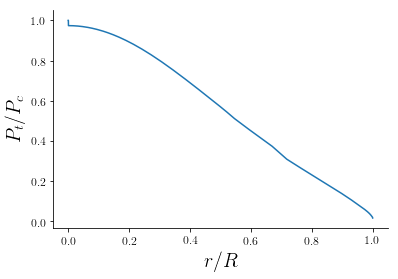

In [17]:
#plt.plot(1,3,1)
plt.plot(riso/riso[-1],pt/pt[0])
#plt.xlim(0,1)
plt.xlabel(r'$ r / R$ ')
plt.ylabel(r'$ P_{t}/P_{c} $')

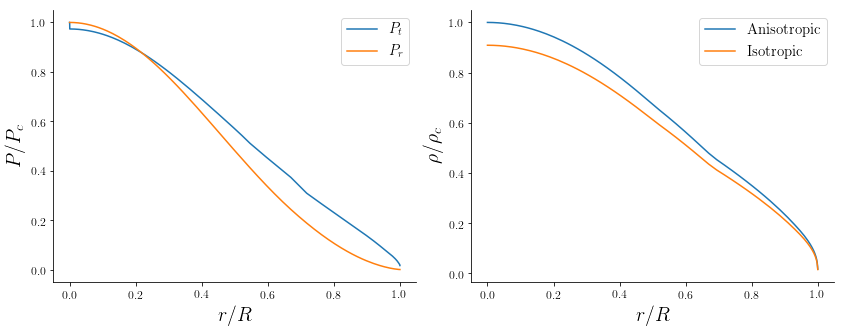

In [23]:
fig= plt.figure(figsize=[14,5])

fig.tight_layout()
fig.subplots_adjust(hspace=1,wspace=0.15)

                    
plt.subplot(1,2,1)
plt.plot(riso/riso[-1],pt/pt[0],label=r'$P_t$')
plt.plot(riso/riso[-1],Piso/Piso[0],label=r'$P_r$')
plt.xlabel(r'$ r / R$ ')
plt.ylabel(r'$ P/P_{c}$')

plt.legend()

plt.subplot(1,2,2)

plt.plot(riso/riso[-1],rhoiso/rhoiso[0],label="Anisotropic")
plt.plot(riso/riso[-1],rhoiso/rhoiso[0]*(1/alpha),label="Isotropic")
plt.xlabel(r'$ r / R$ ')
plt.ylabel(r'$ \rho/\rho_c $')


plt.legend()

plt.savefig('figures/H4P_Anis.pdf', format='pdf', dpi=1000,bbox_inches="tight")

plt.show()
